In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/DATASET/financial_fraud_detection_dataset.csv' # Replace with the actual path

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("DataFrame loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
DataFrame loaded successfully!
  transaction_id                   timestamp sender_account receiver_account  \
0        T100000  2023-08-22T09:22:43.516168      ACC877572        ACC388389   
1        T100001  2023-08-04T01:58:02.606711      ACC895667        ACC944962   
2        T100002  2023-05-12T11:39:33.742963      ACC733052        ACC377370   
3        T100003  2023-10-10T06:04:43.195112      ACC996865        ACC344098   
4        T100004  2023-09-24T08:09:02.700162      ACC584714        ACC497887   

    amount transaction_type merchant_category location device_used  is_fraud  \
0   343.78       withdrawal         utilities    Tokyo      mobile     False   
1   419.65       withdrawal            online  Toronto         atm     False   
2  2773.86          deposit             other   London         pos     False   
3  1666.22          deposit            online   Sydney         pos     False   
4    24.43         transfer         utilities  Toronto      mo

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 119.3 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
#Printing out datatypes of variables-important for feature engineering.
df.info()
print("\nColumn Data Types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [ ]:
#ENCODING PT1
# Columns to drop due to high cardinality or irrelevance for direct encoding:
cols_to_drop = ['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'ip_address']

# Columns for one-hot encoding:
cols_for_onehot = ['transaction_type', 'merchant_category', 'device_used', 'fraud_type', 'payment_channel', 'location', 'device_hash']

# Target variable (no encoding needed for the variable itself):
target_col = 'is_fraud'

print("Plan for encoding categorical variables:")
print(f"Columns to be dropped: {cols_to_drop}")
print(f"Columns for one-hot encoding: {cols_for_onehot}")
print(f"Target variable: {target_col}")

Plan for encoding categorical variables:
Columns to be dropped: ['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'ip_address']
Columns for one-hot encoding: ['transaction_type', 'merchant_category', 'device_used', 'fraud_type', 'payment_channel', 'location', 'device_hash']
Target variable: is_fraud


In [ ]:
#ENCODING PT2
# Converting USEFUL columns into usable data.
import category_encoders as ce
import pandas as pd

# Drop the columns identified for dropping
cols_to_drop = ['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'ip_address']

# Columns for one-hot encoding (lower cardinality)
cols_for_onehot = ['transaction_type', 'merchant_category', 'device_used', 'fraud_type', 'payment_channel']

# Columns for target encoding (higher cardinality)
cols_for_target_encoding = ['location', 'device_hash']

# Separate target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Apply Target Encoding to high cardinality columns
target_encoder = ce.TargetEncoder(cols=cols_for_target_encoding)
X_target_encoded = target_encoder.fit_transform(X[cols_for_target_encoding], y)

# Drop original high cardinality columns and add target encoded columns
X_processed = X.drop(columns=cols_for_target_encoding)
X_processed = pd.concat([X_processed, X_target_encoded], axis=1)

# Apply one-hot encoding to the lower cardinality columns
X_processed = pd.get_dummies(X_processed, columns=cols_for_onehot, drop_first=True)

# Drop other identified columns
X_processed = X_processed.drop(columns=cols_to_drop)

# Combine processed features with the target variable
df_encoded = pd.concat([X_processed, y], axis=1)


# Display the first few rows of the encoded DataFrame to verify
print("DataFrame after dropping and encoding:")
display(df_encoded.head())

# Display the data types of the encoded DataFrame to verify
print("\nData types of the encoded DataFrame:")
print(df_encoded.dtypes)

DataFrame after dropping and encoding:


,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,location,device_hash,transaction_type_payment,transaction_type_transfer,transaction_type_withdrawal,...,merchant_category_retail,merchant_category_travel,merchant_category_utilities,device_used_mobile,device_used_pos,device_used_web,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer,is_fraud
0,343.78,NaN,-0.21,3,0.22,0.035815,0.030817,False,False,True,...,False,False,True,True,False,False,False,True,False,False
1,419.65,NaN,-0.14,7,0.96,0.036039,0.030817,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2773.86,NaN,-1.78,20,0.89,0.036008,0.031238,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1666.22,NaN,-0.60,6,0.37,0.035926,0.030817,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,24.43,NaN,0.79,13,0.27,0.036039,0.030364,False,True,False,...,False,False,True,True,False,False,False,False,False,False



Data types of the encoded DataFrame:
amount                           float64
time_since_last_transaction      float64
spending_deviation_score         float64
velocity_score                     int64
geo_anomaly_score                float64
location                         float64
device_hash                      float64
transaction_type_payment            bool
transaction_type_transfer           bool
transaction_type_withdrawal         bool
merchant_category_grocery           bool
merchant_category_online            bool
merchant_category_other             bool
merchant_category_restaurant        bool
merchant_category_retail            bool
merchant_category_travel            bool
merchant_category_utilities         bool
device_used_mobile                  bool
device_used_pos                     bool
device_used_web                     bool
payment_channel_UPI                 bool
payment_channel_card                bool
payment_channel_wire_transfer       bool
is_fraud           

Shape of original training data: (4000000, 23)
Shape of resampled training data: (7712716, 23)
Class distribution in original training data:
 is_fraud
False    3856358
True      143642
Name: count, dtype: int64
Class distribution in resampled training data:
 is_fraud
False    3856358
True     3856358
Name: count, dtype: int64

Decision Tree Model Evaluation:

Confusion Matrix:
[[957480   6609]
 [  8014  27897]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    964089
        True       0.81      0.78      0.79     35911

    accuracy                           0.99   1000000
   macro avg       0.90      0.88      0.89   1000000
weighted avg       0.99      0.99      0.99   1000000



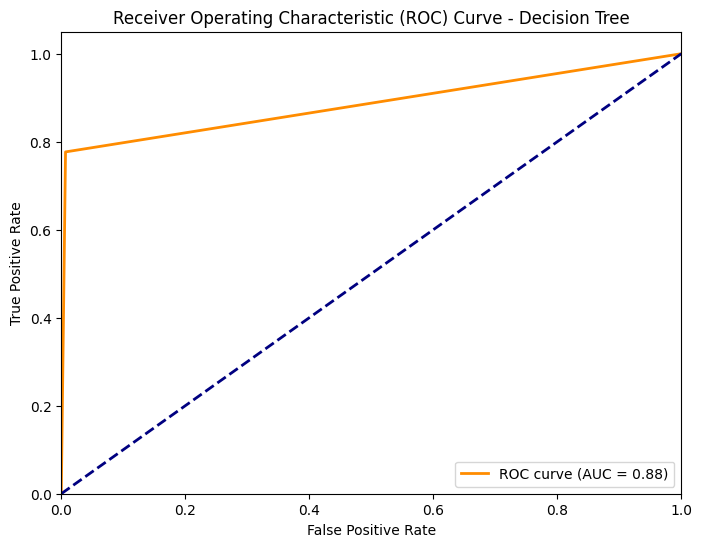


ROC AUC Score: 0.8850


In [ ]:
#Splitting dataset + SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Separate features and target variable
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_res.shape)
print("Class distribution in original training data:\n", y_train.value_counts())
print("Class distribution in resampled training data:\n", y_train_res.value_counts())

# -----------------------
# Train Decision Tree model
# -----------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

# -----------------------
# Evaluate the model
# -----------------------
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

print("\nDecision Tree Model Evaluation:")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Logistic Regression Model Evaluation (SGDClassifier):

Confusion Matrix:
[[916542  47547]
 [ 26573   9338]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0.96    964089
        True       0.16      0.26      0.20     35911

    accuracy                           0.93   1000000
   macro avg       0.57      0.61      0.58   1000000
weighted avg       0.94      0.93      0.93   1000000



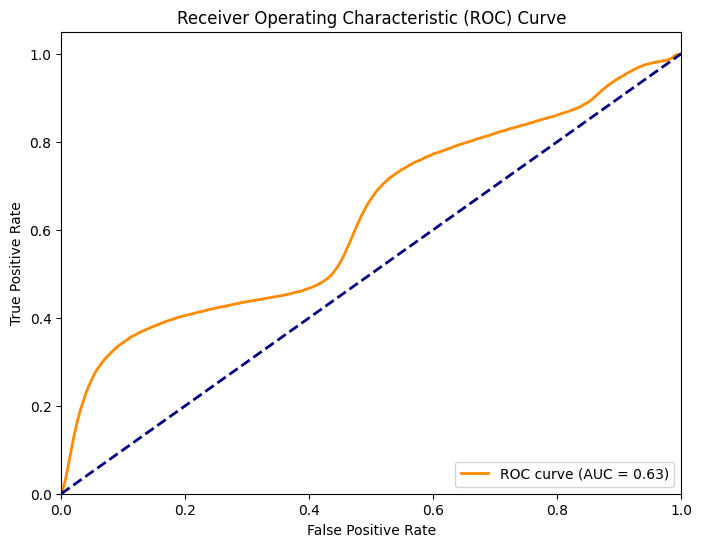


ROC AUC Score: 0.6264


In [ ]:
#Decision Trees
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier # Import SGDClassifier

# Use the encoded and resampled data from the previous cell
# X_train_res, y_train_res, X_test, y_test are available from the previous cell execution

# -----------------------
# Train Logistic Regression model using SGDClassifier
# -----------------------
# Use SGDClassifier with 'log_loss' for logistic regression
log_reg_model = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, tol=1e-3)
log_reg_model.fit(X_train_res, y_train_res)

# -----------------------
# Evaluate the model
# -----------------------
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Model Evaluation (SGDClassifier):")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")